#1. Installing required libraries

In [2]:
!pip install -q openai gradio pypdf tiktoken langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 812.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.5 MB/s eta 0:00:00


In [4]:
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f33bc5f6d0d6d885dece4bf7de510fb8f815386f37a0c16ccbf9b22fcff73ac8
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


#2. Importing the necessary libraries

In [5]:
import os
import tiktoken
import gradio as gr
from langchain import OpenAI , PromptTemplate
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import pipeline
from langchain import LLMChain, HuggingFaceHub

# Finetuning arxiv dataset on bart-cnn or bartbase model

In [1]:
pip install datasets

In [2]:
from datasets import load_dataset

In [7]:
# Load the dataset
# dataset = load_dataset("ccdv/arxiv-summarization")

'''The repository for ccdv/arxiv-summarization contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/arxiv-summarization.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.'''

'The repository for ccdv/arxiv-summarization contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/arxiv-summarization.\nYou can avoid this prompt in future by passing the argument `trust_remote_code=True`.'

In [3]:


# Load the dataset
arxiv_dataset = load_dataset("ccdv/arxiv-summarization")

# Define the filter function
def filter_by_word_count(example):
    return example['article'].lower().split().count('finance') > 2

# Apply the filter to the dataset
dataset = arxiv_dataset.filter(filter_by_word_count)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for ccdv/arxiv-summarization contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/arxiv-summarization.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/203037 [00:00<?, ? examples/s]

Filter:   0%|          | 0/6436 [00:00<?, ? examples/s]

Filter:   0%|          | 0/6440 [00:00<?, ? examples/s]

In [4]:
type(arxiv_dataset)

datasets.dataset_dict.DatasetDict

In [6]:
# Check the structure of the dataset
print(arxiv_dataset)

# List all the splits available
print("Splits: ", arxiv_dataset.keys())

# Get number of rows for each split
for split in arxiv_dataset.keys():
    print(f"Number of rows in {split}: {len(arxiv_dataset[split])}")

# Get the column names for each split
for split in arxiv_dataset.keys():
    print(f"\nColumns in {split}:")
    print(arxiv_dataset[split].column_names)

# Display a few sample rows from each split
for split in arxiv_dataset.keys():
    print(f"\nSample rows from {split}:")
    print(arxiv_dataset[split].select(range(5)))



DatasetDict({
    train: Dataset({
        features: ['article', 'abstract'],
        num_rows: 203037
    })
    validation: Dataset({
        features: ['article', 'abstract'],
        num_rows: 6436
    })
    test: Dataset({
        features: ['article', 'abstract'],
        num_rows: 6440
    })
})
Splits:  dict_keys(['train', 'validation', 'test'])
Number of rows in train: 203037
Number of rows in validation: 6436
Number of rows in test: 6440

Columns in train:
['article', 'abstract']

Columns in validation:
['article', 'abstract']

Columns in test:
['article', 'abstract']

Sample rows from train:
Dataset({
    features: ['article', 'abstract'],
    num_rows: 5
})

Sample rows from validation:
Dataset({
    features: ['article', 'abstract'],
    num_rows: 5
})

Sample rows from test:
Dataset({
    features: ['article', 'abstract'],
    num_rows: 5
})


In [9]:
# Check the number of examples in the filtered dataset
print(f"Number of examples after filtering: {len(dataset['train'])}")

Number of examples after filtering: 345


#Exploring the dataset

In [10]:
# Display the number of columns and the top 10 rows for the 'train' split
print(f"Number of columns: {len(dataset['train'].column_names)}")
print(f"Column names: {dataset['train'].column_names}")

# Display the top 10 rows
top_10_rows = dataset['train'].select(range(10))
print(top_10_rows)

Number of columns: 2
Column names: ['article', 'abstract']
Dataset({
    features: ['article', 'abstract'],
    num_rows: 10
})


In [11]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [12]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['article', 'abstract'],
        num_rows: 345
    })
    validation: Dataset({
        features: ['article', 'abstract'],
        num_rows: 11
    })
    test: Dataset({
        features: ['article', 'abstract'],
        num_rows: 12
    })
})


In [13]:
dataset.keys

<function DatasetDict.keys>

In [14]:
for split in dataset.keys():
    print(f"Dataset split: {split}")
    print(dataset[split])
    print(dataset[split].column_names)
    print(dataset[split][0])
    print(f"Number of rows in {split}: {len(dataset[split])}")
    print()

Dataset split: train
Dataset({
    features: ['article', 'abstract'],
    num_rows: 345
})
['article', 'abstract']
{'article': 'many complex systems in various areas of science exhibit a spatio - temporal dynamics that is inhomogeneous and can be effectively described by a superposition of several statistics on different scales , in short a superstatistics @xcite . \n the superstatistics notion was introduced in @xcite , in the mean time many applications for a variety of complex systems have been pointed out @xcite . \n essential for this approach is the existence of sufficient time scale separation between two relevant dynamics within the complex system . \n there is an intensive parameter @xmath1 that fluctuates on a much larger time scale than the typical relaxation time of the local dynamics . in a thermodynamic \n setting , @xmath1 can be interpreted as a local inverse temperature of the system , but much broader interpretations are possible . \n the stationary distributions of s

In [15]:
dataset.values()

dict_values([Dataset({
    features: ['article', 'abstract'],
    num_rows: 345
}), Dataset({
    features: ['article', 'abstract'],
    num_rows: 11
}), Dataset({
    features: ['article', 'abstract'],
    num_rows: 12
})])

In [16]:
# Display the top 10 rows with some content from 'article' and 'abstract'
for idx, row in enumerate(top_10_rows):
    print(f"Row {idx + 1}:")
    print(f"Article (first 500 chars): {row['article'][:500]}")
    print(f"Abstract (first 200 chars): {row['abstract'][:200]}")
    print("-" * 80)


Row 1:
Article (first 500 chars): many complex systems in various areas of science exhibit a spatio - temporal dynamics that is inhomogeneous and can be effectively described by a superposition of several statistics on different scales , in short a superstatistics @xcite . 
 the superstatistics notion was introduced in @xcite , in the mean time many applications for a variety of complex systems have been pointed out @xcite . 
 essential for this approach is the existence of sufficient time scale separation between two relevant d
Abstract (first 200 chars): we provide an overview on superstatistical techniques applied to complex systems with time scale separation . 
 three examples of recent applications are dealt with in somewhat more detail : the stati
--------------------------------------------------------------------------------
Row 2:
Article (first 500 chars): the purpose of this paper is to outline the fundamental role the mittag - leffler function in renewal processes that are 

In [17]:
# Print one whole article and its corresponding abstract
article = top_10_rows[0]['article']
abstract = top_10_rows[0]['abstract']

print("Article 1:")
print(article)
print("\nAbstract 1:")
print(abstract)

Article 1:
many complex systems in various areas of science exhibit a spatio - temporal dynamics that is inhomogeneous and can be effectively described by a superposition of several statistics on different scales , in short a superstatistics @xcite . 
 the superstatistics notion was introduced in @xcite , in the mean time many applications for a variety of complex systems have been pointed out @xcite . 
 essential for this approach is the existence of sufficient time scale separation between two relevant dynamics within the complex system . 
 there is an intensive parameter @xmath1 that fluctuates on a much larger time scale than the typical relaxation time of the local dynamics . in a thermodynamic 
 setting , @xmath1 can be interpreted as a local inverse temperature of the system , but much broader interpretations are possible . 
 the stationary distributions of superstatistical systems , obtained by averaging over all @xmath1 , typically exhibit non - gaussian behavior with fat tail

# Fine tuning the best performing  model that is Facebook Bart:

In [18]:
# model to fine tune: facebook/bart-large-cnn

In [19]:
print('Length of the first article is:',len(article))
print('Length of the corresponding abstract of first article is:',len(abstract))

Length of the first article is: 25082
Length of the corresponding abstract of first article is: 567


# 1. Preparing the Dataset Subset

In [20]:
from datasets import load_dataset
from transformers import BartTokenizer
import torch
from torch.utils.data import DataLoader

# Load the dataset : already loaded
# dataset = load_dataset("ccdv/arxiv-summarization")

# Taking a subset of the dataset (1000 rows)
train_subset = dataset['train'].select(range(100))
val_subset = dataset['validation'].select(range(10))

# Initialize tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

# Tokenize the data
def tokenize_function(examples):
    inputs = examples['article']
    targets = examples['abstract']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length')

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True, padding='max_length')

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

train_tokenized = train_subset.map(tokenize_function, batched=True)
val_tokenized = val_subset.map(tokenize_function, batched=True)

# Convert to PyTorch format
train_tokenized.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_tokenized.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Create dataloaders
train_dataloader = DataLoader(train_tokenized, shuffle=True, batch_size=4)
val_dataloader = DataLoader(val_tokenized, batch_size=4)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

#2. Fine Tuning the Model

In [21]:
from transformers import BartForConditionalGeneration, Trainer, TrainingArguments

# Load pre-trained BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
# Defining training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # number of training epochs
    per_device_train_batch_size=2,   # batch size for training
    per_device_eval_batch_size=2,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
)
# Initializing Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized
)
# Training the model
trainer.train()


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.677100,3.420602


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_

TrainOutput(global_step=50, training_loss=3.7655558013916015, metrics={'train_runtime': 3662.8537, 'train_samples_per_second': 0.027, 'train_steps_per_second': 0.014, 'total_flos': 216710460211200.0, 'train_loss': 3.7655558013916015, 'epoch': 1.0})

In [22]:
# Save the model

# Save the trained model and tokenizer
model.save_pretrained('./bart_finance_finetuned')
tokenizer.save_pretrained('./bart_finance_finetuned')


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


('./bart_finance_finetuned/tokenizer_config.json',
 './bart_finance_finetuned/special_tokens_map.json',
 './bart_finance_finetuned/vocab.json',
 './bart_finance_finetuned/merges.txt',
 './bart_finance_finetuned/added_tokens.json')

In [23]:
# Create a zip

import shutil

# Create a zip file of the saved model directory
shutil.make_archive('bart_finance_finetuned', 'zip', './bart_finance_finetuned')


'/content/bart_finance_finetuned.zip'

In [24]:
# download the zip file

'''
from google.colab import files
files.download('bart_finetuned.zip')
'''

"\nfrom google.colab import files\nfiles.download('bart_finetuned.zip')\n"

In [25]:
# To load the model in any environment after extracting it

'''from transformers import BartTokenizer, BartForConditionalGeneration

# Load the model and tokenizer from the local path
tokenizer = BartTokenizer.from_pretrained('path_to_extracted_model')
model = BartForConditionalGeneration.from_pretrained('path_to_extracted_model')
'''

"from transformers import BartTokenizer, BartForConditionalGeneration\n\n# Load the model and tokenizer from the local path\ntokenizer = BartTokenizer.from_pretrained('path_to_extracted_model')\nmodel = BartForConditionalGeneration.from_pretrained('path_to_extracted_model')\n"

In [26]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Path to the directory where the model was saved
model_path = './bart_finance_finetuned'  # Path where the model and tokenizer were saved

# Load the model and tokenizer
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# Function to summarize text
def summarize_text(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example dummy text
dummy_text = """
The BART model, developed by Facebook AI, is a powerful model for sequence-to-sequence tasks.
It is based on a transformer architecture and combines bidirectional and autoregressive transformers.
BART is particularly effective for text generation tasks, such as summarization and translation,
by leveraging both the encoder and decoder components.
"""

# Summarize the dummy text
summary = summarize_text(dummy_text)
print("Original Text:")
print(dummy_text)
print("\nSummary:")
print(summary)


Original Text:

The BART model, developed by Facebook AI, is a powerful model for sequence-to-sequence tasks.
It is based on a transformer architecture and combines bidirectional and autoregressive transformers.
BART is particularly effective for text generation tasks, such as summarization and translation,
by leveraging both the encoder and decoder components.


Summary:
The BART model is a powerful model for sequence-to-sequence tasks. It is based on a transformer architecture and combines bidirectional and autoregressive transformers. BART is particularly effective for text generation tasks, such as summarization and translation.


In [27]:
print(len(dummy_text))
print(len(summary))

349
265


# Final Comparison of ROUGE Scores before and after fine tuning

In [30]:
loader = PyPDFLoader('/content/CorporateFinance-IJMSBR.pdf')

In [31]:
docs = loader.load()


In [32]:
len(docs)


11

In [33]:
type(docs)


list

In [34]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)


In [35]:
texts = text_splitter.split_documents(docs)


In [36]:
len(texts) #to show the number of chunks


73

In [37]:
text_i_str = " ".join([str(doc) for doc in docs])


In [38]:
type(text_i_str)


str

In [39]:
len(text_i_str)


57337

In [40]:
text_i_str


"page_content='See discussions, st ats, and author pr ofiles f or this public ation at : https://www .researchgate.ne t/public ation/281557147\nUnderstanding Corporate Finance: Experiences of Emerging Economies and\nCase of a High-Income Small Developing Cou ntry\nArticle  · July 2015\nCITATIONS\n0READS\n7,262\n1 author:\nHav en Allahar\nUniv ersity of the West Indies, St . Augustine\n40 PUBLICA TIONS \xa0\xa0\xa0230 CITATIONS \xa0\xa0\xa0\nSEE PROFILE\nAll c ontent f ollo wing this p age was uplo aded b y Hav en Allahar  on 07 Sept ember 2015.\nThe user has r equest ed enhanc ement of the do wnlo aded file.' metadata={'source': '/content/CorporateFinance-IJMSBR.pdf', 'page': 0} page_content='International Journal of Management Sciences and Business Research, July -2015 ISSN (2226 -8235) Vol -4, Issue 7  \nhttp://www.ijmsbr.com   Page 34 Understanding  Corporate  Finance : Experience of  Emerging Economies and Case of a High -Income \nSmall Developing Country . \n \nAuthor Details:  \n

In [41]:
import re


In [42]:
import re



# Use regular expressions to extract text between "Abstract" and "Keywords"
# match = re.search(r'Abstract\s(.*?)\sKeywords:', text_i_str, re.DOTALL)
match = re.search(r'(?i)abstract\s(.*?)\s(?i)keywords', text_i_str, re.DOTALL)
if match:
    reference_summary = match.group(1).strip()
else:
    raise ValueError("Could not find 'Abstract' or 'Keywords' in the document")

print(reference_summary)

The purpose of this paper is to provide an overview of the theories, concepts and issues involved in the area of corporate finance 
and the implications for emerging economies. A secondary research appr oach was adopted based on a review of published texts, 
journals, and technical reports.  The results  of the study demonstrate that based on the indicators of capital market development, 
the high -income developing country of Trinidad and Tobago used as a case study, lags behind in critical areas of development o f 
its capital market and, along with related developing countries, can benefit fro m the fundamental principles involved in the 
practice of corporate finance. The practical implications of the study are the potential use by students in tertiary level instit utions 
engaged in MBA or financial management studies, participants pursuing professional qualifications  in accounting and finance, 
employees in financial institutions, and general stakeholders seeking to invest funds

<ipython-input-42-610906bdb0da>:7: DeprecationWarning: Flags not at the start of the expression '(?i)abstract\\s(.*?)\\' (truncated) but at position 21
  match = re.search(r'(?i)abstract\s(.*?)\s(?i)keywords', text_i_str, re.DOTALL)


# Generating summary with bart- without finetune

In [43]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


# Load the tokenizer and model

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")



# Tokenize the input text
inputs = tokenizer(text_i_str, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary
# here controlling the length of summary in numer of tokens
# summary_ids = model.generate(inputs["input_ids"], max_length=1500, min_length=150, do_sample=False)

summary_ids = model.generate(
    inputs["input_ids"],
    max_length=2500,
    min_length=250,
    do_sample=False,
    length_penalty=1.0,  # Default value
    repetition_penalty=1.0,  # Default value
    early_stopping=False  # Try setting this to True or False
)

# Decode the summary
summary_i = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# print(summary_i)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [44]:
print(summary_i)

Understanding Corporate Finance: Experiences of Emerging Economies andCase of a High-Income Small Developing Cou ntry. The study shows that based on the indicators of capital market development,  Trinidad and Tobago lags behind in critical areas of development. The practical implications of the study are the potential use by students in tertiary level instit utions, participants pursuing professional qualifications in accounting and finance, and general stakeholders seeking to invest funds. The value of this paper is that it ex plores and presents data on an area of stu dy which is considered esoteric and largely ignored in the formal literature on small developing states, particularly the island -states of the Caribbean. Its value further lies in its contribution to the understand ing of the field of corporate finance and related issues and identification of  implications for developing  economies. The research is limited to the extent that only secondary data sources were explored an

In [45]:
from rouge_score import rouge_scorer


In [54]:
def calculate_accuracy(reference_summary, generated_summary, model_name):
    generated_summary = generated_summary.replace('\n', ' ')
    reference_summary = reference_summary.replace('\n', ' ')

    # Initialize the ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Calculate ROUGE scores
    scores = scorer.score(reference_summary, generated_summary)

    print(f'Model name: {model_name}')
    print("ROUGE-1:", scores['rouge1'])
    print("ROUGE-2:", scores['rouge2'])
    print("ROUGE-L:", scores['rougeL'])

    # Prepare the scores to return
    return {
        'model_name': model_name,
        'rouge1': scores['rouge1'],
        'rouge2': scores['rouge2'],
        'rougeL': scores['rougeL']
    }

In [55]:
calculate_accuracy(reference_summary,summary_i,'BART_Normal')


Model name: BART_Normal
ROUGE-1: Score(precision=0.8317757009345794, recall=0.714859437751004, fmeasure=0.7688984881209503)
ROUGE-2: Score(precision=0.704225352112676, recall=0.6048387096774194, fmeasure=0.650759219088937)
ROUGE-L: Score(precision=0.7289719626168224, recall=0.6265060240963856, fmeasure=0.673866090712743)


{'model_name': 'BART_Normal',
 'rouge1': Score(precision=0.8317757009345794, recall=0.714859437751004, fmeasure=0.7688984881209503),
 'rouge2': Score(precision=0.704225352112676, recall=0.6048387096774194, fmeasure=0.650759219088937),
 'rougeL': Score(precision=0.7289719626168224, recall=0.6265060240963856, fmeasure=0.673866090712743)}

# now using finetuned model on finance dataset

In [48]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Path to the directory where the model was saved
model_path = './bart_finance_finetuned'  # Path where the model and tokenizer were saved

# Load the model and tokenizer
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# Function to summarize text
def summarize_text(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [49]:
summary_ii = summarize_text(text_i_str)

In [50]:
print(summary_ii)

Understanding Corporate Finance: Experiences of Emerging Economies and the Case of a High -Income Small Developing Cou ntry,    7,262                                                    The study provides an overview of the theories, concepts and issues involved in the area of corporate finance (CF) and the implications for emerging economies. The results  of the study demonstrate that based on the indicators of capital market development,                 the high -income developing country of Trinidad and Tobago lags behind in critical areas of development o f its capital market and, along with related developing countries, can benefit fro m the fundamental principles involved in corporate finance. The practical implications of this study are the potential use by students in tert


In [56]:
calculate_accuracy(reference_summary,summary_ii,'BART_finetuned_finance')


Model name: BART_finetuned_finance
ROUGE-1: Score(precision=0.9107142857142857, recall=0.40963855421686746, fmeasure=0.5650969529085872)
ROUGE-2: Score(precision=0.7747747747747747, recall=0.3467741935483871, fmeasure=0.4791086350974931)
ROUGE-L: Score(precision=0.7946428571428571, recall=0.357429718875502, fmeasure=0.49307479224376727)


{'model_name': 'BART_finetuned_finance',
 'rouge1': Score(precision=0.9107142857142857, recall=0.40963855421686746, fmeasure=0.5650969529085872),
 'rouge2': Score(precision=0.7747747747747747, recall=0.3467741935483871, fmeasure=0.4791086350974931),
 'rougeL': Score(precision=0.7946428571428571, recall=0.357429718875502, fmeasure=0.49307479224376727)}

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ROUGE scores for both models
scores_normal = calculate_accuracy(reference_summary,summary_i,'BART_Normal')

scores_finetuned =calculate_accuracy(reference_summary,summary_ii,'BART_finetuned_finance')


Model name: BART_Normal
ROUGE-1: Score(precision=0.8317757009345794, recall=0.714859437751004, fmeasure=0.7688984881209503)
ROUGE-2: Score(precision=0.704225352112676, recall=0.6048387096774194, fmeasure=0.650759219088937)
ROUGE-L: Score(precision=0.7289719626168224, recall=0.6265060240963856, fmeasure=0.673866090712743)
Model name: BART_finetuned_finance
ROUGE-1: Score(precision=0.9107142857142857, recall=0.40963855421686746, fmeasure=0.5650969529085872)
ROUGE-2: Score(precision=0.7747747747747747, recall=0.3467741935483871, fmeasure=0.4791086350974931)
ROUGE-L: Score(precision=0.7946428571428571, recall=0.357429718875502, fmeasure=0.49307479224376727)


<ipython-input-61-d53b9b19d882>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ROUGE Type', y='Score', hue='Model', data=df, ci=None, palette='muted')


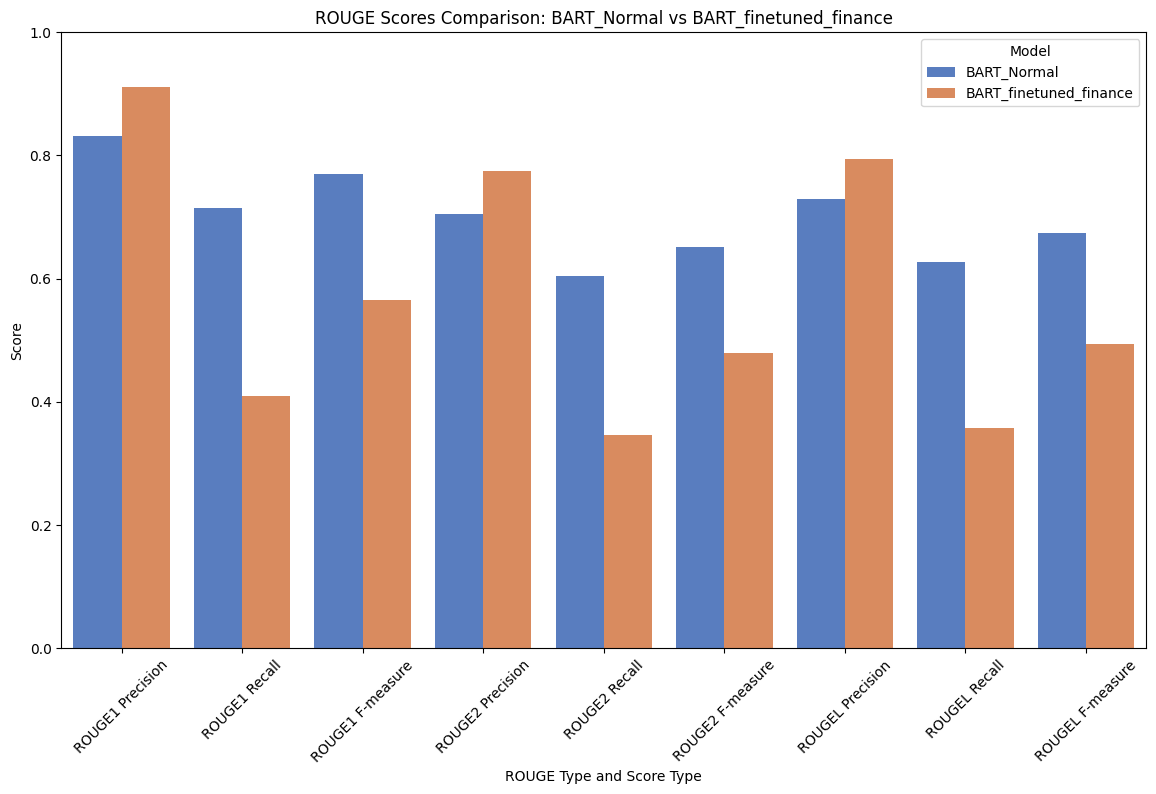

In [61]:
data = []
for model_scores in [scores_normal, scores_finetuned]:
    for rouge_type in ['rouge1', 'rouge2', 'rougeL']:
        data.append({
            'Model': model_scores['model_name'],
            'ROUGE Type': f"{rouge_type.upper()} Precision",
            'Score': model_scores[rouge_type].precision
        })
        data.append({
            'Model': model_scores['model_name'],
            'ROUGE Type': f"{rouge_type.upper()} Recall",
            'Score': model_scores[rouge_type].recall
        })
        data.append({
            'Model': model_scores['model_name'],
            'ROUGE Type': f"{rouge_type.upper()} F-measure",
            'Score': model_scores[rouge_type].fmeasure
        })

df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='ROUGE Type', y='Score', hue='Model', data=df, ci=None, palette='muted')
plt.title('ROUGE Scores Comparison: BART_Normal vs BART_finetuned_finance')
plt.xlabel('ROUGE Type and Score Type')
plt.ylabel('Score')
plt.legend(title='Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

<ipython-input-66-e69a87fae8bb>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ROUGE Type', y='Score', hue='Model', data=df, ci=None, palette='muted')


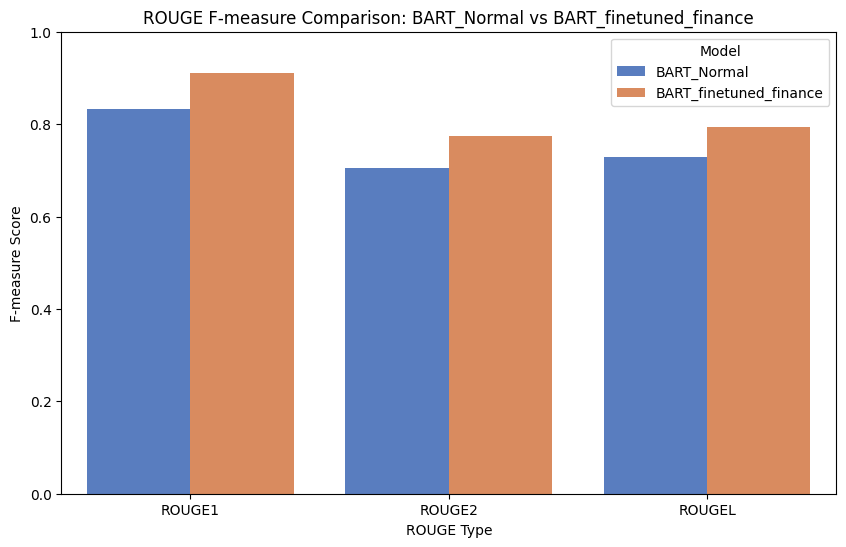

In [66]:
# Prepare data for plotting
data = []
for model_scores in [scores_normal, scores_finetuned]:
    for rouge_type in ['rouge1', 'rouge2', 'rougeL']:
        data.append({
            'Model': model_scores['model_name'],
            'ROUGE Type': rouge_type.upper(),
            'Score Type': 'F-measure',
            'Score': model_scores[rouge_type].precision
        })

df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='ROUGE Type', y='Score', hue='Model', data=df, ci=None, palette='muted')
plt.title('ROUGE F-measure Comparison: BART_Normal vs BART_finetuned_finance')
plt.xlabel('ROUGE Type')
plt.ylabel('F-measure Score')
plt.legend(title='Model')
plt.ylim(0, 1)
plt.show()

<ipython-input-65-5089a32d9885>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ROUGE Type', y='F-measure', hue='Model', data=df, ci=None, palette='muted')


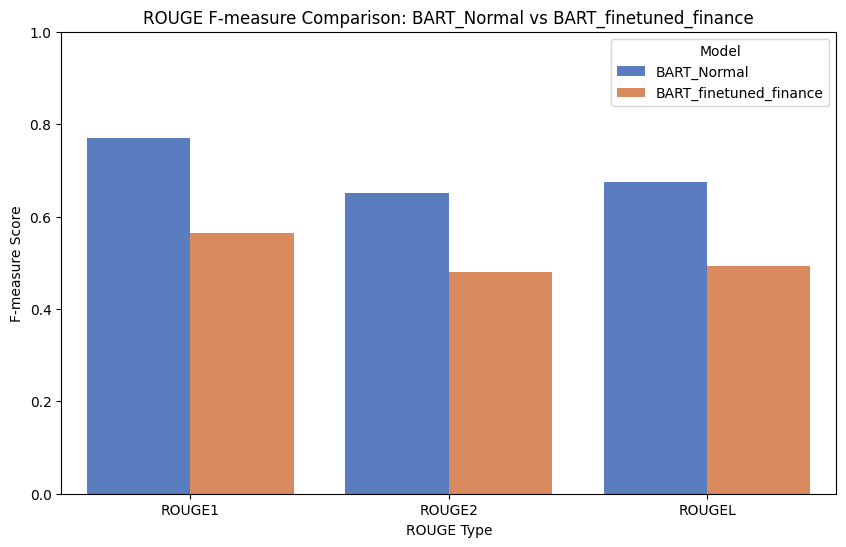

In [65]:
data = []
for model_scores in [scores_normal, scores_finetuned]:
    for rouge_type in ['rouge1', 'rouge2', 'rougeL']:
        data.append({
            'Model': model_scores['model_name'],
            'ROUGE Type': rouge_type.upper(),
            'F-measure': model_scores[rouge_type].fmeasure
        })

df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='ROUGE Type', y='F-measure', hue='Model', data=df, ci=None, palette='muted')
plt.title('ROUGE F-measure Comparison: BART_Normal vs BART_finetuned_finance')
plt.xlabel('ROUGE Type')
plt.ylabel('F-measure Score')
plt.legend(title='Model')
plt.ylim(0, 1)
plt.show()